In [1]:
# Importing all the required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Define the label names for the featues
labels = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]

In [3]:
# Import dataset into the codebase
datasetDiabetes = pd.read_csv("pima-indians-diabetes.csv",names=labels)

In [4]:
# view a preview of the data
datasetDiabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# check the shape of the dataset
datasetDiabetes.shape

(768, 9)

In [6]:
# Features data-type
datasetDiabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Statistical view
datasetDiabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
# check the null count of each coluumn
datasetDiabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

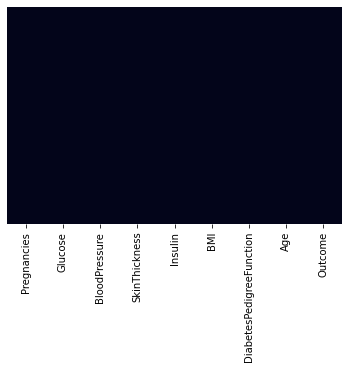

In [9]:
#heatmap showing the null values (there aren't any)
sns.heatmap(datasetDiabetes.isnull(),yticklabels=False,cbar=False)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

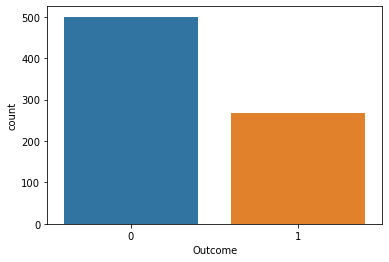

In [10]:
# result countplot
sns.countplot(x = 'Outcome',data = datasetDiabetes)

In [11]:
#number of diabetic patients(outcome = 1) and non diabetic (outcome = 0)
datasetDiabetes.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

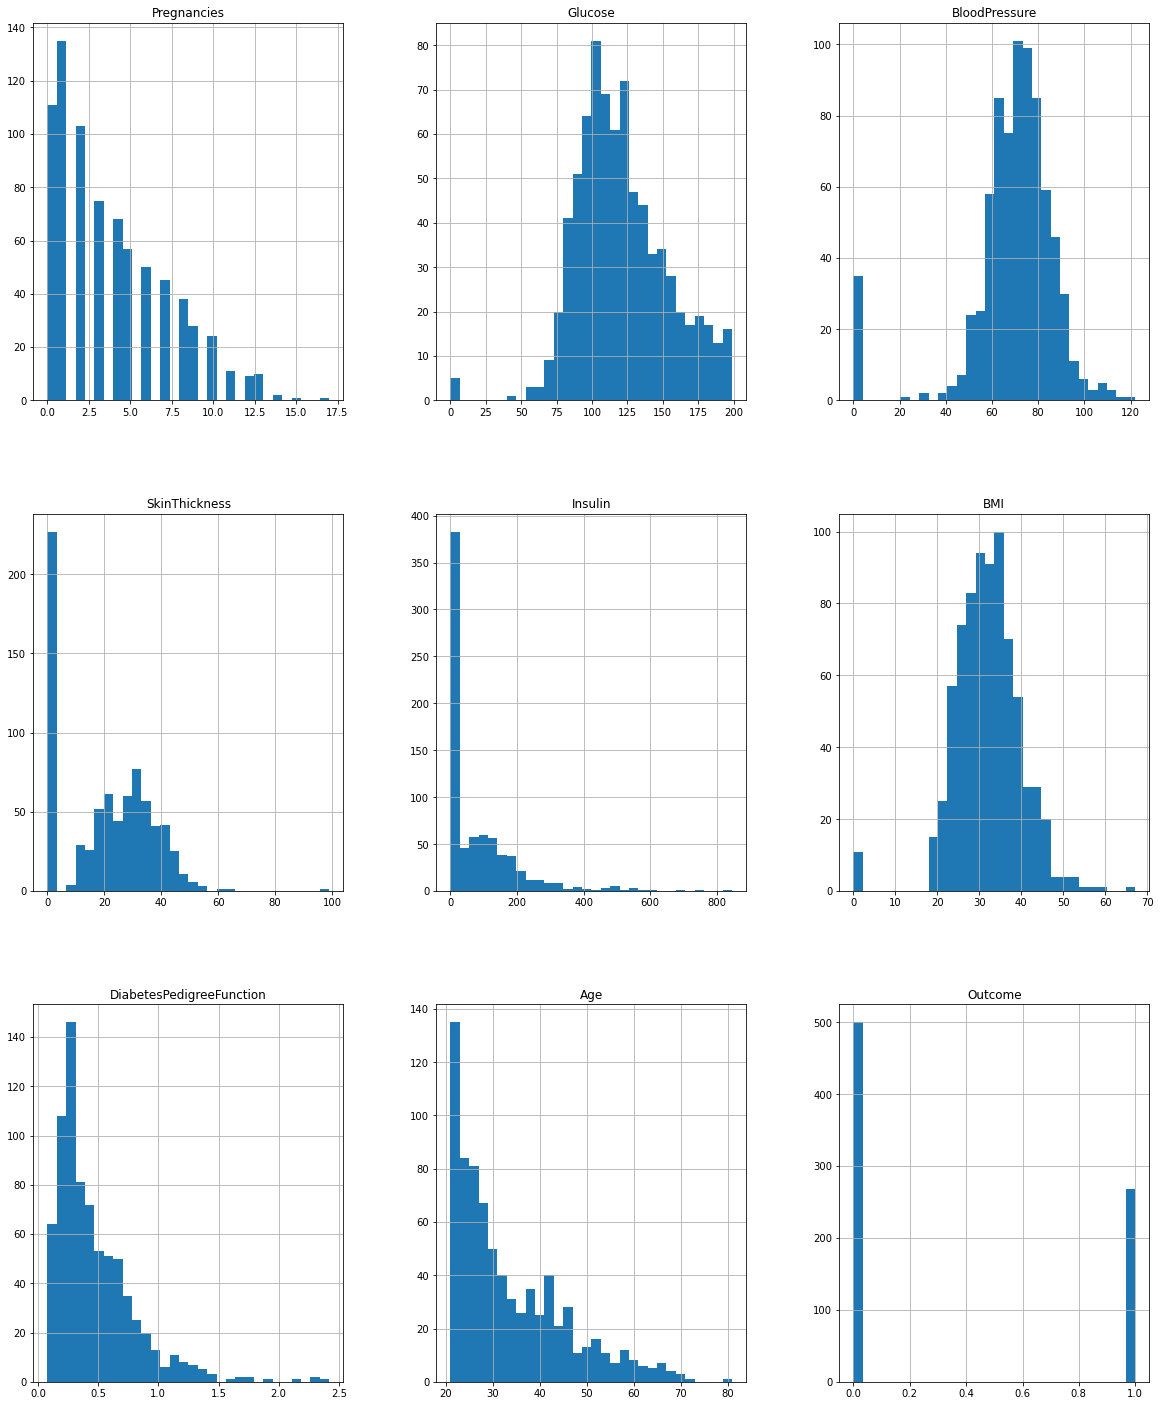

In [12]:
#Visualizing the data
datasetDiabetes.hist(bins=30, figsize=(20, 25))
plt.show()


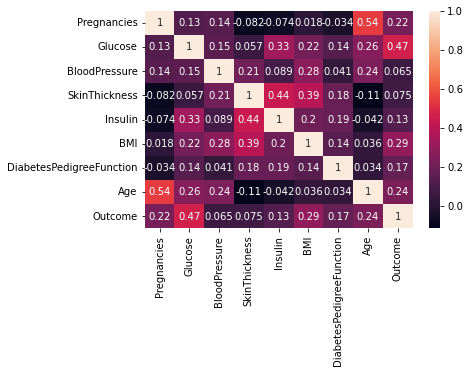

In [13]:
#View Heatmap
sns.heatmap(datasetDiabetes.corr(), annot = True)
plt.show()

In [14]:
#View in a table
datasetDiabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [16]:
#Printing the minium values of datasets, thus checking for 0 values
print("Pregnancies = ", datasetDiabetes['Pregnancies'].min())
print("Glucose = ", datasetDiabetes['Glucose'].min())
print("BloodPressure = ", datasetDiabetes['BloodPressure'].min())
print("SkinThickness = ", datasetDiabetes['SkinThickness'].min())
print("Insulin = ", datasetDiabetes['Insulin'].min())
print("BMI = ", datasetDiabetes['BMI'].min())
print("DiabetesPedigreeFunction = ", datasetDiabetes['DiabetesPedigreeFunction'].min())
print("Age = ", datasetDiabetes['Age'].min())
print("Outcome = ", datasetDiabetes['Outcome'].min())

Pregnancies =  0
Glucose =  0
BloodPressure =  0
SkinThickness =  0
Insulin =  0
BMI =  0.0
DiabetesPedigreeFunction =  0.078
Age =  21
Outcome =  0


In [17]:
# Replace all the rows which contain "0" with Median
datasetDiabetes['Glucose'] = datasetDiabetes['Glucose'].replace(to_replace=0,value=datasetDiabetes['Glucose'].median())
datasetDiabetes['BloodPressure'] = datasetDiabetes['BloodPressure'].replace(to_replace=0,value=datasetDiabetes['BloodPressure'].median())
datasetDiabetes['SkinThickness'] = datasetDiabetes['SkinThickness'].replace(to_replace=0,value=datasetDiabetes['SkinThickness'].median())
datasetDiabetes['Insulin'] = datasetDiabetes['Insulin'].replace(to_replace=0,value=datasetDiabetes['Insulin'].median())
datasetDiabetes['BMI'] = datasetDiabetes['BMI'].replace(to_replace=0,value=datasetDiabetes['BMI'].median())

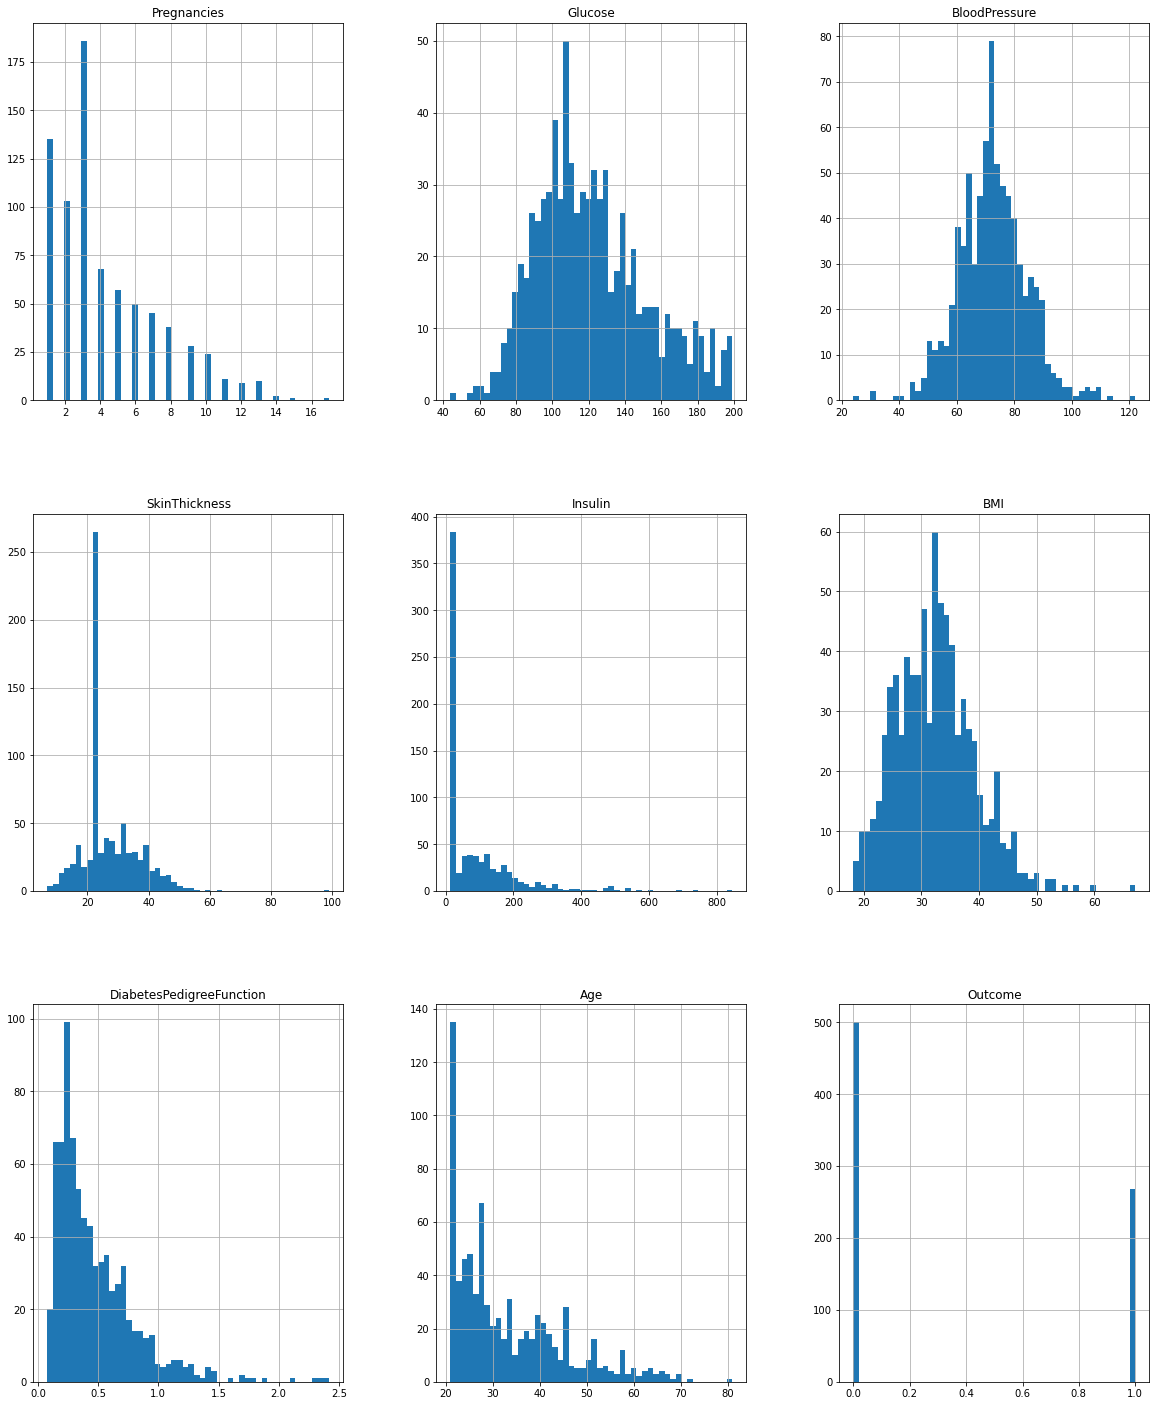

In [18]:
datasetDiabetes.hist(bins=50, figsize=(20, 25))
plt.show()

In [20]:
#View the featues of the dataset
datasetDiabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [21]:
#shape of the dataset
datasetDiabetes.shape

(768, 9)

In [22]:
datasetDiabetes.iloc[:,0:8]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,3,137,40,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63
764,2,122,70,27,30.5,36.8,0.340,27
765,5,121,72,23,112.0,26.2,0.245,30
766,1,126,60,23,30.5,30.1,0.349,47


In [23]:
X_labels = datasetDiabetes.iloc[:,0:8]

In [24]:
y_labels = datasetDiabetes['Outcome']

In [25]:
#Scaling the Dataset

In [26]:
#import scaler
from sklearn.preprocessing import MinMaxScaler as Scaler

In [27]:
#scaling the dataframe
scaler = Scaler()
X_df = scaler.fit_transform(X_labels)

In [28]:
#shape of the scaled data
X_df.shape

(768, 8)

In [29]:
X_df = pd.DataFrame(X_df,columns=labels[0:8])

In [30]:
#dataset preview
X_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.3125,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333
1,0.0000,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667
2,0.4375,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333
3,0.0000,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.1250,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000


In [31]:
#splitting the data into test, train dataframes

X_train, X_test, Y_train, Y_test = train_test_split(X_df, y_labels, test_size = 0.20, random_state = 42, stratify = datasetDiabetes['Outcome'] )

In [32]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (614, 8)
Y_train shape: (614,)
X_test shape: (154, 8)
Y_test shape: (154,)


In [152]:
# Create the Model
# Random forest Algorithm - model
# import RandomForestClassifier and accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
ranfor = RandomForestClassifier(n_estimators = 80,max_features='sqrt',min_samples_leaf=1, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=80, random_state=42)

In [153]:
Y_pred_ranfor = ranfor.predict(X_test)
# Evaluating modelaccurecy using accuracy_score metric
accuracy_ranfor = accuracy_score(Y_test, Y_pred_ranfor)

In [154]:
#Evaluate the model
#Check the accurecy rate of the model
print("Random Forest: " + str(accuracy_ranfor * 100))

Random Forest: 77.27272727272727


In [132]:
#Define a function to get the suitable accuracte values for all the hyperparametere
from sklearn.model_selection import GridSearchCV
 
# defining parameters and their range
param_grid = {'n_estimators': [1, 10, 50, 100, 500, 1000],
              'max_features': ['sqrt', 'auto', 0.2],
              'min_samples_leaf': [1,10,50,100],
              'min_samples_leaf': [1, 2, 4],
             }
 
grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, Y_train)

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 3564 candidates, totalling 17820 fits
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=0.699 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=0.683 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=0.593 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=0.707 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=0.697 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.732 total time=   0.0s
[CV 2/5] END bootstrap=True

[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=0.795 total time=   0.7s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000;, score=0.764 total time=   1.5s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000;, score=0.789 total time=   1.5s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000;, score=0.724 total time=   1.4s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000;, score=0.772 total time=   1.4s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000;, score=0.779 total time=   1.4s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_lea

[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.795 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500;, score=0.764 total time=   0.6s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500;, score=0.805 total time=   0.7s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500;, score=0.724 total time=   0.6s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500;, score=0.764 total time=   0.6s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500;, score=0.795 total time=   0.6s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, 

[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.795 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.764 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.789 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.724 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.780 total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.795 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_lea

[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.797 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.756 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.756 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.787 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.748 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.789 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_

[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.748 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.821 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.715 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.780 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.795 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.732 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_s

[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.805 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.740 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.764 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.779 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.772 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.797 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1

[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.732 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.780 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.740 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.780 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.762 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.732 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_s

[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.813 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.740 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.756 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.779 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.732 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.797 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_

[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.772 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.805 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.756 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.772 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.811 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.772 total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4,

[CV 2/5] END bootstrap=True, max_depth=10, max_features=0.2, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.797 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=0.2, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.748 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=0.2, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.764 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=0.2, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.770 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=0.2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.740 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=0.2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.797 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=0.2, min_samples_leaf=1, min_samples

[CV 2/5] END bootstrap=True, max_depth=10, max_features=0.2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.789 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=0.2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.789 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=0.2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.756 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=0.2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.770 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=0.2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.764 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=0.2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.805 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=0.2, min_samples_leaf=2, min_samples

[CV 2/5] END bootstrap=True, max_depth=10, max_features=0.2, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.805 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=0.2, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.756 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=0.2, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.772 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=0.2, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.779 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=0.2, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.780 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=0.2, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.805 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=0.2, min_samples_leaf=2, min_s

[CV 2/5] END bootstrap=True, max_depth=10, max_features=0.2, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.780 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=0.2, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.732 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=0.2, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.764 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=0.2, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.787 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=0.2, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.756 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=0.2, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.789 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=0.2, min_samples_leaf=4, min_samples

[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.805 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.683 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.772 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.787 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.732 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.805 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_

[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.813 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.715 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.797 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.787 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.740 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.805 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1

[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.732 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.780 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.707 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.789 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.754 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.748 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_s

[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.756 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.797 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.756 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.764 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.754 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.805 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_s

[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.805 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.748 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.780 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.795 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.780 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.813 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4

[CV 2/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.772 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.756 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.772 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.779 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.740 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.780 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_

[CV 2/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.772 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.699 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.780 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.770 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.772 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.789 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_

[CV 2/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.813 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.732 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.732 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.779 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.772 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.805 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2

[CV 1/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.748 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.789 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.740 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.772 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.779 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.789 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_s

[CV 2/5] END bootstrap=True, max_depth=20, max_features=0.2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.789 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=0.2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.764 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=0.2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.764 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=0.2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.770 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=0.2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.748 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=0.2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.813 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=0.2, min_samples_leaf=1, min_samples

[CV 1/5] END bootstrap=True, max_depth=20, max_features=0.2, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.756 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=0.2, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.805 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=0.2, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.732 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=0.2, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.772 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=0.2, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.770 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=0.2, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.756 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=0.2, min_samples_leaf=1, min_sa

[CV 2/5] END bootstrap=True, max_depth=20, max_features=0.2, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.764 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=0.2, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.732 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=0.2, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.772 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=0.2, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.779 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=0.2, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.740 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=0.2, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.821 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=0.2, min_samples_leaf=2, min_samples

[CV 5/5] END bootstrap=True, max_depth=20, max_features=0.2, min_samples_leaf=4, min_samples_split=2, n_estimators=10;, score=0.746 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=0.2, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.748 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=0.2, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.813 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=0.2, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.772 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=0.2, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.764 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=0.2, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.770 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=0.2, min_samples_leaf=4, min_samples_s

[CV 2/5] END bootstrap=True, max_depth=20, max_features=0.2, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.813 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=0.2, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.764 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=0.2, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.764 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=0.2, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.779 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=0.2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.748 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=0.2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.797 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=0.2, min_samples_leaf=4, min_s

[CV 1/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.732 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.772 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.715 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.748 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.770 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.764 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_s

[CV 2/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.780 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.715 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.780 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.762 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.740 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.780 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_

[CV 1/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.748 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.797 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.715 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.772 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.803 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.756 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2,

[CV 2/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.797 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.756 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.772 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.803 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.724 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.797 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_

[CV 1/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.748 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.756 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.764 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.764 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.820 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.748 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_s

[CV 2/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.789 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.764 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.764 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.787 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.748 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.789 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1

[CV 2/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.789 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.724 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.797 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.770 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.772 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.780 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_

[CV 2/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.805 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.748 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.748 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.795 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.789 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.805 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_

[CV 1/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.740 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.805 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.724 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.764 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.795 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.748 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4,

[CV 2/5] END bootstrap=True, max_depth=30, max_features=0.2, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.797 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=30, max_features=0.2, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.732 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=30, max_features=0.2, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.797 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=30, max_features=0.2, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.746 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=30, max_features=0.2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.740 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=30, max_features=0.2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.764 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=30, max_features=0.2, min_samples_leaf=1, min_samples

[CV 1/5] END bootstrap=True, max_depth=30, max_features=0.2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.740 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=30, max_features=0.2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.789 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=30, max_features=0.2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.707 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=30, max_features=0.2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.756 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=30, max_features=0.2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.721 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=30, max_features=0.2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.764 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=30, max_features=0.2, min_samples_leaf=2, min_samples_

[CV 2/5] END bootstrap=True, max_depth=30, max_features=0.2, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.797 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=30, max_features=0.2, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.740 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=30, max_features=0.2, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.764 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=30, max_features=0.2, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.779 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=30, max_features=0.2, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.756 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=30, max_features=0.2, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.805 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=30, max_features=0.2, min_samples_leaf=2, min_s

[CV 2/5] END bootstrap=True, max_depth=30, max_features=0.2, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.772 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=30, max_features=0.2, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.740 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=30, max_features=0.2, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.772 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=30, max_features=0.2, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.779 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=30, max_features=0.2, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.748 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=30, max_features=0.2, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.805 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=30, max_features=0.2, min_samples_leaf=4, min_samples

[CV 1/5] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.724 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.748 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.748 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.764 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.811 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.724 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_s

[CV 2/5] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.772 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.748 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.780 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.803 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.748 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.772 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1

[CV 2/5] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.797 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.707 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.764 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.803 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.724 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.780 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_

[CV 2/5] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.797 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.740 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.797 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.779 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.756 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.797 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_

[CV 1/5] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.740 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.780 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.732 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.805 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.787 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.772 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4,

[CV 2/5] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.805 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.756 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.772 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.754 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.764 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.797 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_

[CV 2/5] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.789 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.724 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.756 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.754 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.724 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.764 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_

[CV 2/5] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.789 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.748 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.764 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.803 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.756 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.805 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2

[CV 1/5] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.748 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.772 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.732 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.789 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.795 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.740 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_s

[CV 2/5] END bootstrap=True, max_depth=40, max_features=0.2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.740 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=40, max_features=0.2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.748 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=40, max_features=0.2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.764 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=40, max_features=0.2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.746 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=40, max_features=0.2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.740 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=40, max_features=0.2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.789 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=40, max_features=0.2, min_samples_leaf=1, min_samples

[CV 2/5] END bootstrap=True, max_depth=40, max_features=0.2, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.789 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=40, max_features=0.2, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.756 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=40, max_features=0.2, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.772 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=40, max_features=0.2, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.779 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=40, max_features=0.2, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.748 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=40, max_features=0.2, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.780 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=40, max_features=0.2, min_samples_leaf=1, min_s

[CV 2/5] END bootstrap=True, max_depth=40, max_features=0.2, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.805 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=40, max_features=0.2, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.780 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=40, max_features=0.2, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.756 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=40, max_features=0.2, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.787 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=40, max_features=0.2, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.732 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=40, max_features=0.2, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.789 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=40, max_features=0.2, min_samples_leaf=2, min_samples

[CV 2/5] END bootstrap=True, max_depth=40, max_features=0.2, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.756 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=40, max_features=0.2, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.740 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=40, max_features=0.2, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.772 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=40, max_features=0.2, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.770 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=40, max_features=0.2, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.748 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=40, max_features=0.2, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.797 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=40, max_features=0.2, min_samples_leaf=4, min_samples

[CV 2/5] END bootstrap=True, max_depth=40, max_features=0.2, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.780 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=40, max_features=0.2, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.764 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=40, max_features=0.2, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.797 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=40, max_features=0.2, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.762 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=40, max_features=0.2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.748 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=40, max_features=0.2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.772 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=40, max_features=0.2, min_samples_leaf=4, min_s

[CV 1/5] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.732 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.780 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.748 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.780 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.779 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.772 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_s

[CV 1/5] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.764 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.805 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.715 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.772 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.754 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.756 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_s

[CV 1/5] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.748 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.780 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.732 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.780 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.787 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.756 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2,

[CV 2/5] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.813 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.740 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.780 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.803 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.764 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.772 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_

[CV 5/5] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.738 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.764 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.780 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.724 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.772 total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.779 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_sa

[CV 1/5] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.772 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.797 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.748 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.764 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.803 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.748 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1,

[CV 1/5] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.732 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.805 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.732 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.772 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.770 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.756 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_s

[CV 1/5] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.740 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.772 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.740 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.772 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.795 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.740 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_s

[CV 1/5] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.707 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.829 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.740 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.756 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.795 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.764 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4,

[CV 1/5] END bootstrap=True, max_depth=50, max_features=0.2, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.748 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=50, max_features=0.2, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.813 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=50, max_features=0.2, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.748 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=50, max_features=0.2, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.789 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=50, max_features=0.2, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.803 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=50, max_features=0.2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.748 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=50, max_features=0.2, min_samples_leaf=1, min_samples_

[CV 2/5] END bootstrap=True, max_depth=50, max_features=0.2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.797 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=50, max_features=0.2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.740 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=50, max_features=0.2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.772 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=50, max_features=0.2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.787 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=50, max_features=0.2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.748 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=50, max_features=0.2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.805 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=50, max_features=0.2, min_samples_leaf=2, min_samples

[CV 1/5] END bootstrap=True, max_depth=50, max_features=0.2, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.756 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=50, max_features=0.2, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.748 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=50, max_features=0.2, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.715 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=50, max_features=0.2, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.764 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=50, max_features=0.2, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.770 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=50, max_features=0.2, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.748 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=50, max_features=0.2, min_samples_leaf=2, min_sa

[CV 2/5] END bootstrap=True, max_depth=50, max_features=0.2, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.797 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=50, max_features=0.2, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.748 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=50, max_features=0.2, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.756 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=50, max_features=0.2, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.762 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=50, max_features=0.2, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.756 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=50, max_features=0.2, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.829 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=50, max_features=0.2, min_samples_leaf=4, min_samples

[CV 1/5] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.780 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.756 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.740 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.789 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.779 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.748 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_s

[CV 1/5] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.748 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.772 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.748 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.748 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.795 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.764 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=1,

[CV 1/5] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.756 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.789 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.764 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.764 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.762 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.772 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_s

[CV 5/5] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10;, score=0.803 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.764 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.805 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.715 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.748 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.770 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_sa

[CV 1/5] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.748 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.780 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.715 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.772 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.811 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.780 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4,

[CV 1/5] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.789 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.789 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.732 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.756 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.787 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.764 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_s

[CV 1/5] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.740 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.732 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.756 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.780 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.779 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.748 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_s

KeyboardInterrupt: 

In [155]:
# Confusion of the matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_ranfor)
cm

array([[85, 15],
       [20, 34]], dtype=int64)

<AxesSubplot:>

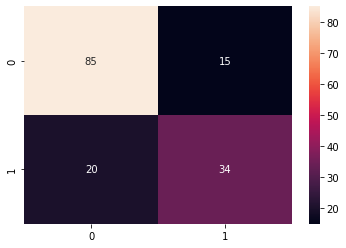

In [156]:
# Confusion matrix view in a Heatmap
sns.heatmap(pd.DataFrame(cm), annot=True)

In [157]:
# Print a Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_ranfor))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       100
           1       0.69      0.63      0.66        54

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



In [160]:
#Use Shap to interpreting the model
#import library
import shap

In [161]:
shap.initjs()

In [164]:
explainer = shap.KernelExplainer(ranfor.predict_proba, X_train)

Using 614 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [165]:
shap_values = explainer.shap_values(X_test)

  0%|          | 0/154 [00:00<?, ?it/s]

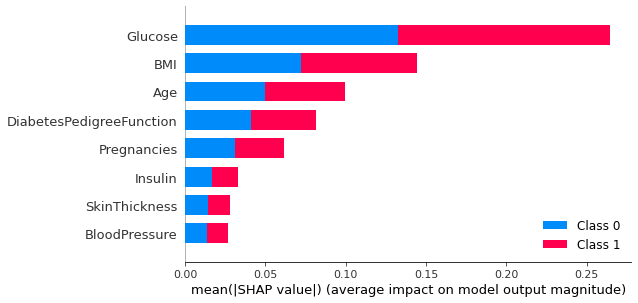

In [166]:
#Display a summary of all the effect features
shap.summary_plot(shap_values,X_test)

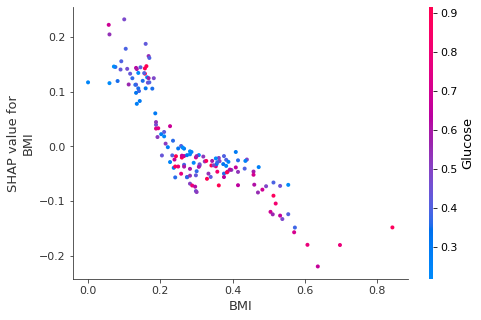

In [169]:
#dependency plot for BMI
shap.dependence_plot(5,shap_values[0], X_test)

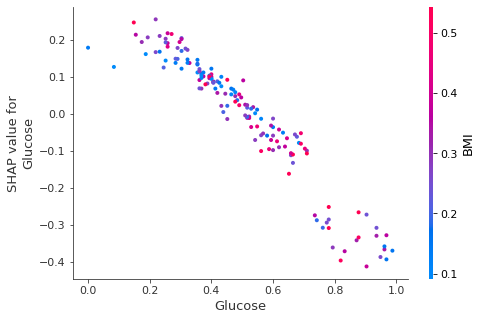

In [168]:
#ependency plot for glucose
shap.dependence_plot(1,shap_values[0], X_test)